In [61]:
from matplotlib import pyplot as plt
from glob import glob
from rdkit.Chem import AllChem
import numpy as np
import math

atoms=[]
type_list=[]
for path in glob('data/outputs/docking/dhodh/act_pdbs_pose/*'):
    mol = AllChem.MolFromPDBFile(path)
    if mol:
        conformer=mol.GetConformer()
        for i,atom in enumerate(mol.GetAtoms()):
            atoms.append(conformer.GetAtomPosition(i))
            type_list.append(atom.GetSymbol())
grid={}
grid['min_x']=np.min(np.array(atoms)[:,0])
grid['min_y']=np.min(np.array(atoms)[:,1])
grid['min_z']=np.min(np.array(atoms)[:,2])
grid['max_x']=np.max(np.array(atoms)[:,0])
grid['max_y']=np.max(np.array(atoms)[:,1])
grid['max_z']=np.max(np.array(atoms)[:,2])

for atom,type in zip(atoms,type_list):
    if type not in ['C','N','O']:
        type='Other'
    if type not in grid:
        grid[type]=np.zeros([math.ceil(grid['max_x']-grid['min_x']),math.ceil(grid['max_y']-grid['min_y']),math.ceil(grid['max_z']-grid['min_z'])])
    grid[type][int((atom[0]-grid['min_x'])//1),int((atom[1]-grid['min_y'])//1),int((atom[2]-grid['min_z'])//1)]+=1
import pickle
with open('grid_dhodh.pkl','wb') as w:
    pickle.dump(grid,w)
with open('grid_dhodh.pkl','rb') as r:
    grid=pickle.load(r)
color={'C':'grey','N':'blue','O':'red','Other':'green'}
fig=plt.figure(figsize=(50,50))
ax=fig.add_subplot(111,projection='3d')
for type in color:
    max_count=np.max(grid[type])
    print(type,max_count)
    x_list=[]
    y_list=[]
    z_list=[]
    size_list=[]
    for x in range(math.ceil(grid['max_x']-grid['min_x'])):
        for y in range(math.ceil(grid['max_y']-grid['min_y'])):
            for z in range(math.ceil(grid['max_z']-grid['min_z'])):
                x_list.append(grid['min_x']+x)
                y_list.append(grid['min_y']+y)
                z_list.append(grid['min_z']+z)
                size_list.append(500*grid[type][x,y,z]/max_count)
    
    im=ax.scatter(x_list,y_list,z_list,s=size_list,color=color[type])
fig.show()


C 632.0
N 483.0
O 216.0
Other 229.0


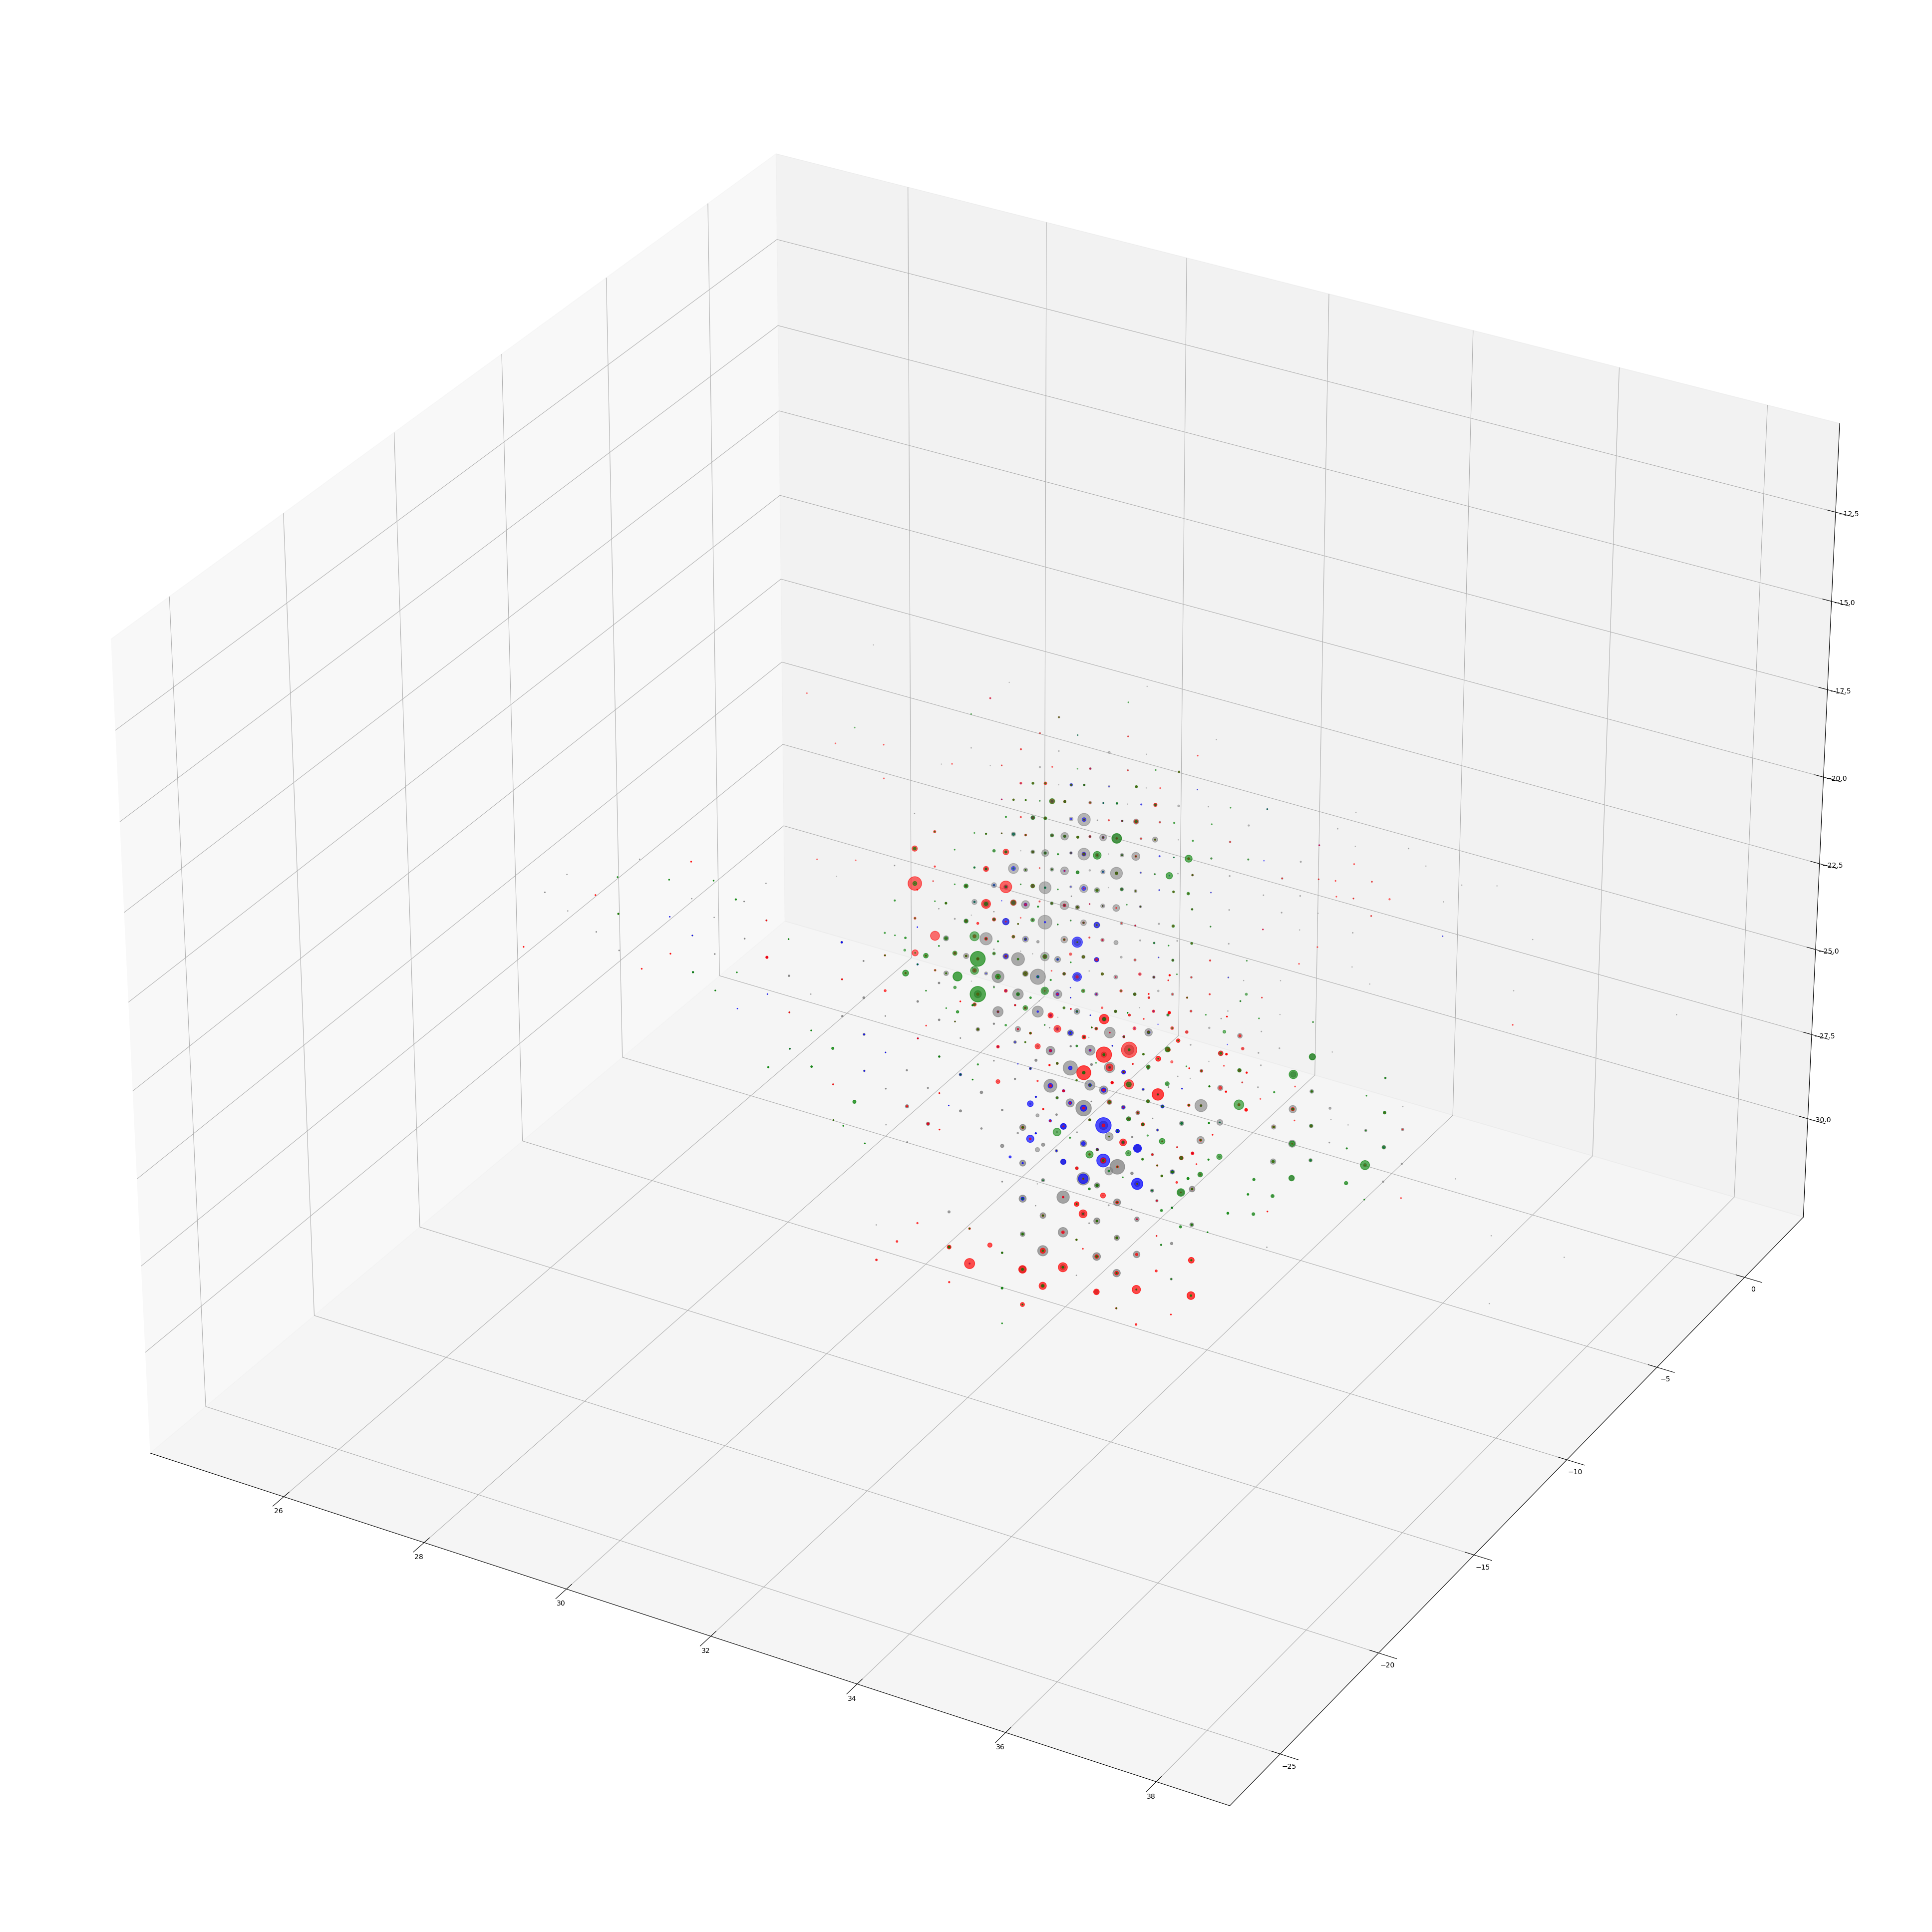

In [62]:
color={'C':'grey','N':'blue','O':'red','Other':'green'}
fig=plt.figure(figsize=(50,50))
ax=fig.add_subplot(111,projection='3d')
for type in color:
    max_count=np.max(grid[type])
    print(type,max_count)
    x_list=[]
    y_list=[]
    z_list=[]
    size_list=[]
    for x in range(math.ceil(grid['max_x']-grid['min_x'])):
        for y in range(math.ceil(grid['max_y']-grid['min_y'])):
            for z in range(math.ceil(grid['max_z']-grid['min_z'])):
                x_list.append(grid['min_x']+x)
                y_list.append(grid['min_y']+y)
                z_list.append(grid['min_z']+z)
                size_list.append(500*grid[type][x,y,z]/max_count)
    
    im=ax.scatter(x_list,y_list,z_list,s=size_list,color=color[type])
fig.show()
